## Solucion numerica a una ecuacion diferencial utilizando el metodo de Cuadratura de Gauss-Legendre

In [17]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [18]:
sp.init_printing()

In [19]:
s = sp.symbols('s')
t = sp.symbols('t', positive=True)

In [20]:
F_str = 1/(s + 1)
F = sp.lambdify(s, F_str)  # Definir la función de la transformada de Laplace
F_str = sp.inverse_laplace_transform(F_str, s, t)  # Transformación inversa de la transformada de Laplace

# Ingreso de los parámetros
a = 0
b = 8
N = 20

In [21]:
print("La expresion evaluada es: ")
F_str

La expresion evaluada es: 


In [22]:
def laplaceinv_Gauss(F, a, b, N):
    # Definicion de los pesos y nodos de la cuadratura de Guass
    x, w = np.polynomial.legendre.leggauss(N)

    # Calculo para la itegral, donde su equivalencia es una sumatoria

    integral = 0
    for i in range(N):
        integral += w[i] * F((b - a) / 2 * x[i] + (a + b) / 2)

    # Multiplicacoin por el factor de escala (b - a) /2
    integral *= (b - a) / 2 

    # Resultado de la integral

    print("El valor de la integral es: ", integral)

    # Crear un vector de valores x para graficar la función
    x_vals = np.linspace(a, b, 1000)
    
    # Evaluar la función F en los valores x
    y_vals = [F(x) for x in x_vals]

    # Graficar la función
    plt.plot(x_vals, y_vals)
    plt.title("Transformada de Laplace inversa " + str(F_str))
    plt.xlabel("t")
    plt.ylabel("f(t)")
    plt.show()

3.9448261889341616
3.9464460040401157
3.949320309541593
3.9533823904543213
3.9585371163077694
3.9646636844040826
3.971618499891621
3.979238550626921
3.9873452304921306
3.9957485266036947
4.004251473396305
4.012654769507869
4.0207614493730786
4.028381500108379
4.035336315595917
4.041462883692231
4.046617609545679
4.050679690458407
4.053553995959884
4.055173811065838
El valor de la integral es:  2.1972245773334214


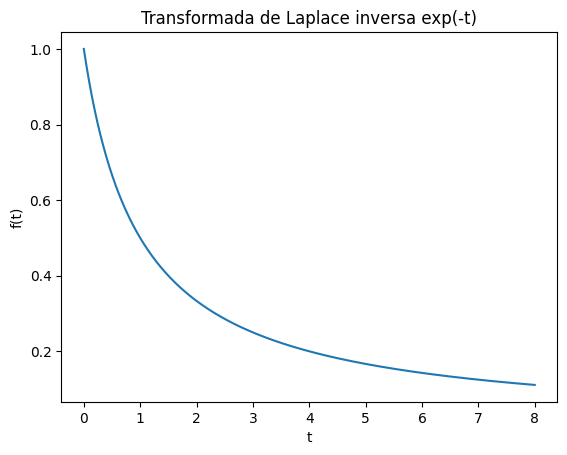

In [23]:
laplaceinv_Gauss(F, a, b, N)

Para la resolución de este problema se utilzo la formula de integración de Gauss Legendre

$\int_{a}^{b} f(x) dx \approx \frac{b-a}{2}\sum_{i=1}^{n} w_{i}f\left(\frac{b-a}{2}x_i+\frac{a+b}{2}\right)$
